In [1]:
#Carga de paquetes

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os.path


In [2]:
# Carga de base de datos

ruta = os.getcwd() + '\\raw\\'

calendar = pd.read_csv(ruta+'calendar.csv')
listings = pd.read_csv(ruta+'listings.csv')
reviews = pd.read_csv(ruta+'reviews.csv')


# Análisis exploratorio

In [3]:
calendar.head(5)

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights
0,30950,2021-12-25,f,"$260,000.00","$260,000.00",180.0,1125.0
1,30950,2021-12-26,f,"$260,000.00","$260,000.00",180.0,1125.0
2,30950,2021-12-27,f,"$260,000.00","$260,000.00",180.0,1125.0
3,30950,2021-12-28,f,"$260,000.00","$260,000.00",180.0,1125.0
4,30950,2021-12-29,f,"$260,000.00","$260,000.00",180.0,1125.0


In [4]:
reviews.head(5)

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,30950,172352638,2017-07-20,23626175,Carlos,"Pamela was an amazing host, her apartment is l..."
1,30950,581637579,2019-12-25,102846301,Marcos Vinícius,La receptividad fue excelente. La ubicacion es...
2,30950,622307266,2020-04-12,46398531,Camilla,This stay was perfect. The apartment has every...
3,30950,628268166,2020-06-07,270106800,Claudia,Un agrado el lugar y la anfitriona excelente c...
4,30950,655491895,2020-08-23,169832005,Francisca,Excelente departamento con ubicación inmejorab...


In [5]:
listings.head(5)

,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,30950,https://www.airbnb.com/rooms/30950,20211225071122,2021-12-25,"Apartment Providencia, Santiago","Located in the heart of Providencia, near by r...","Quiet and typical beatiful neighborghood, a lo...",https://a0.muscache.com/pictures/dedd0a9a-c58a...,132845,https://www.airbnb.com/users/show/132845,...,4.83,4.92,4.75,NaN,f,1,1,0,0,0.22
1,49392,https://www.airbnb.com/rooms/49392,20211225071122,2021-12-25,Share my Flat in Providencia,<b>The space</b><br />Departamento en el barri...,NaN,https://a0.muscache.com/pictures/3740612/b1850...,224592,https://www.airbnb.com/users/show/224592,...,NaN,NaN,NaN,NaN,t,2,1,1,0,NaN
2,52811,https://www.airbnb.com/rooms/52811,20211225071122,2021-12-25,Suite Providencia 1 Santiago Chile,Apartment located on the subway station Manuel...,Edificio ubicado en el acceso a la línea del M...,https://a0.muscache.com/pictures/miso/Hosting-...,244792,https://www.airbnb.com/users/show/244792,...,4.59,4.64,4.36,NaN,t,3,3,0,0,0.34
3,53494,https://www.airbnb.com/rooms/53494,20211225071122,2021-12-25,depto centro ski el colorado chile,<b>The space</b><br />depto 2 dormitorios equi...,NaN,https://a0.muscache.com/pictures/310938/cae3f1...,249097,https://www.airbnb.com/users/show/249097,...,4.89,4.73,4.68,NaN,f,1,1,0,0,0.57
4,55303,https://www.airbnb.com/rooms/55303,20211225071122,2021-12-25,Plaza Lyon piso 3,"Apartamento de dos dormitorios, capacidad hast...",Se encuentra en el corazón de Providencia; caf...,https://a0.muscache.com/pictures/326169/2a8439...,261079,https://www.airbnb.com/users/show/261079,...,5.00,5.00,5.00,NaN,f,3,3,0,0,0.03


In [6]:
listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9139 entries, 0 to 9138
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            9139 non-null   int64  
 1   listing_url                                   9139 non-null   object 
 2   scrape_id                                     9139 non-null   int64  
 3   last_scraped                                  9139 non-null   object 
 4   name                                          9135 non-null   object 
 5   description                                   8564 non-null   object 
 6   neighborhood_overview                         4966 non-null   object 
 7   picture_url                                   9139 non-null   object 
 8   host_id                                       9139 non-null   int64  
 9   host_url                                      9139 non-null   o

Dependiendo de la información en los distintos vamos a seleccionar la información que consideremos que es relevante

In [7]:
listings = listings[['id','property_type','room_type', 'bedrooms', 'beds','amenities','review_scores_rating']]

listings.head(5)

,id,property_type,room_type,bedrooms,beds,amenities,review_scores_rating
0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.50
1,49392,Private room in rental unit,Private room,1.0,1.0,"[""Long term stays allowed""]",NaN
2,52811,Entire rental unit,Entire home/apt,1.0,1.0,"[""Hangers"", ""Cooking basics"", ""First aid kit"",...",4.42
3,53494,Entire rental unit,Entire home/apt,2.0,8.0,"[""Free parking on premises"", ""Essentials"", ""Ki...",4.76
4,55303,Entire rental unit,Entire home/apt,2.0,4.0,"[""Wifi"", ""Kitchen"", ""Heating"", ""Cable TV"", ""Lo...",5.00


In [8]:
print(listings.groupby(['review_scores_rating'])['review_scores_rating'].count().sort_values(ascending=False))

print(listings[['property_type','room_type', 'bedrooms', 'beds','amenities','review_scores_rating']].isna().sum())

#Vamos a sacar los datos que sean nulos y valores 


review_scores_rating
5.00    1741
4.00     203
4.50     179
0.00     167
4.67     153
        ... 
3.82       1
2.67       1
4.04       1
3.91       1
4.41       1
Name: review_scores_rating, Length: 122, dtype: int64
property_type              0
room_type                  0
bedrooms                 371
beds                     244
amenities                  0
review_scores_rating    3259
dtype: int64


In [9]:
#Relleno los campos con nulos con ceros 
listings.fillna(0, inplace=True)

#Saco los datos que antes marcamos con cero por ser nulos
listings = listings[listings.bedrooms > 0]
listings = listings[listings.beds > 0]
listings = listings[listings.review_scores_rating > 0]



Como se aprecia en el gráfico la mayor cantidad de tipos de habitación es la casa completa/Departamento y le sigue habitación privada.

room_type
Entire home/apt    3794
Private room       1533
Hotel room           58
Shared room          56
Name: room_type, dtype: int64


Text(0.5, 0, 'Cantidad')

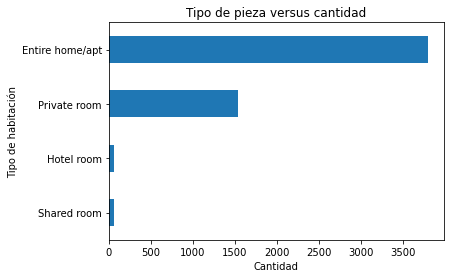

In [11]:

print(listings.groupby(['room_type'])['room_type'].count().sort_values(ascending=False))

listings.groupby(['room_type'])['room_type'].count().sort_values(ascending=True).plot(kind="barh")

plt.title("Tipo de pieza versus cantidad")
plt.ylabel("Tipo de habitación")
plt.xlabel("Cantidad")


property_type
Entire rental unit                  3013
Private room in rental unit          752
Private room in residential home     365
Entire condominium (condo)           353
Entire loft                          104
Name: property_type, dtype: int64


Text(0.5, 0, 'Cantidad')

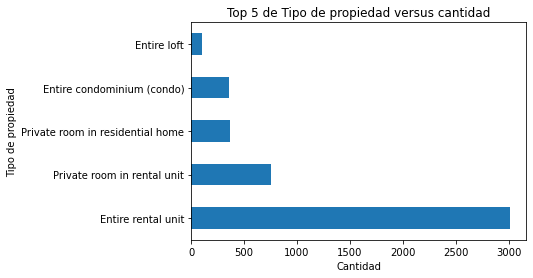

In [12]:
print(listings.groupby(['property_type'])['property_type'].count().sort_values(ascending=True).nlargest(5))

listings.groupby(['property_type'])['property_type'].count().sort_values(ascending=True).nlargest(5).plot(kind="barh")

plt.title("Top 5 de Tipo de propiedad versus cantidad")
plt.ylabel("Tipo de propiedad")
plt.xlabel("Cantidad")


In [13]:
Listings_calendar = calendar.merge(listings, left_on='listing_id', right_on='id')

In [14]:
Listings_calendar.head()

,listing_id,date,available,price,adjusted_price,minimum_nights,maximum_nights,id,property_type,room_type,bedrooms,beds,amenities,review_scores_rating
0,30950,2021-12-25,f,"$260,000.00","$260,000.00",180.0,1125.0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.5
1,30950,2021-12-26,f,"$260,000.00","$260,000.00",180.0,1125.0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.5
2,30950,2021-12-27,f,"$260,000.00","$260,000.00",180.0,1125.0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.5
3,30950,2021-12-28,f,"$260,000.00","$260,000.00",180.0,1125.0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.5
4,30950,2021-12-29,f,"$260,000.00","$260,000.00",180.0,1125.0,30950,Entire rental unit,Entire home/apt,1.0,2.0,"[""Cleaning products"", ""Hangers"", ""Private entr...",4.5


In [15]:
#Se le da el tipo de dato float al precio
Listings_calendar['price'] = Listings_calendar['price'].str.replace('$','',regex=True)

Listings_calendar['price'] = Listings_calendar['price'].str.replace(',','',regex=True)

Listings_calendar['price'] = Listings_calendar['price'].astype('float64').round()

In [16]:
Listings_calendar['price'].head(10)

0    260000.0
1    260000.0
2    260000.0
3    260000.0
4    260000.0
5    260000.0
6    260000.0
7    260000.0
8    260000.0
9    260000.0
Name: price, dtype: float64

In [17]:
roomProperty = Listings_calendar.groupby(['property_type','room_type']).price.mean()
roomProperty = roomProperty.reset_index()
roomProperty=roomProperty.sort_values('price',ascending=[0])
roomProperty.head(10)

,property_type,room_type,price
5,Entire chalet,Entire home/apt,383130.079281
20,Hut,Entire home/apt,220000.000000
7,Entire cottage,Entire home/apt,206721.856164
35,Private room in nature lodge,Private room,183913.200685
14,Entire residential home,Entire home/apt,164889.976580
3,Entire bungalow,Entire home/apt,150000.000000
4,Entire cabin,Entire home/apt,144874.282336
19,Farm stay,Entire home/apt,137995.890411
1,Casa particular,Entire home/apt,126668.493151
18,Entire villa,Entire home/apt,126311.234018


El tipo de propiedad con precio mayor está dado por los colores más oscuros, se utiliza la información de la mediana del precio, por tipo de propiedad y tipo de habitación. 

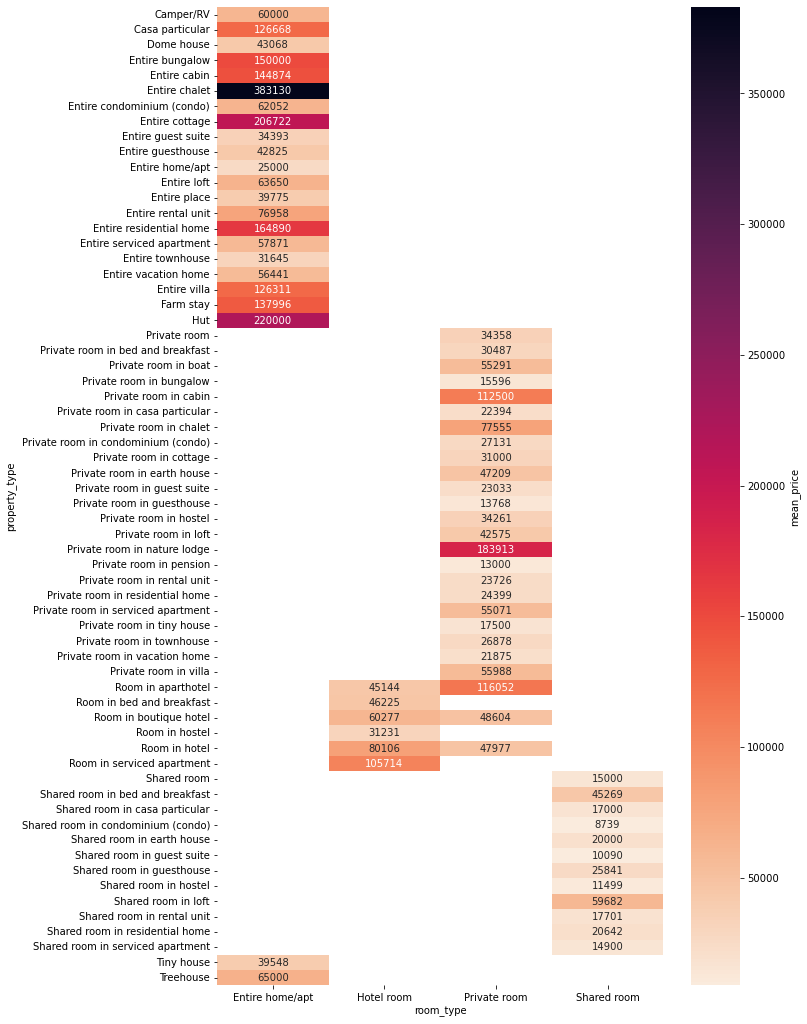

In [18]:
plt.figure(figsize = (10,18))
sns.heatmap(Listings_calendar.groupby(['property_type', 'room_type']).price.mean().unstack(), annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})
plt.show()

A continuación la relación entre la mediana del precio por el tipo de propiedad y cantidad de habitaciones.

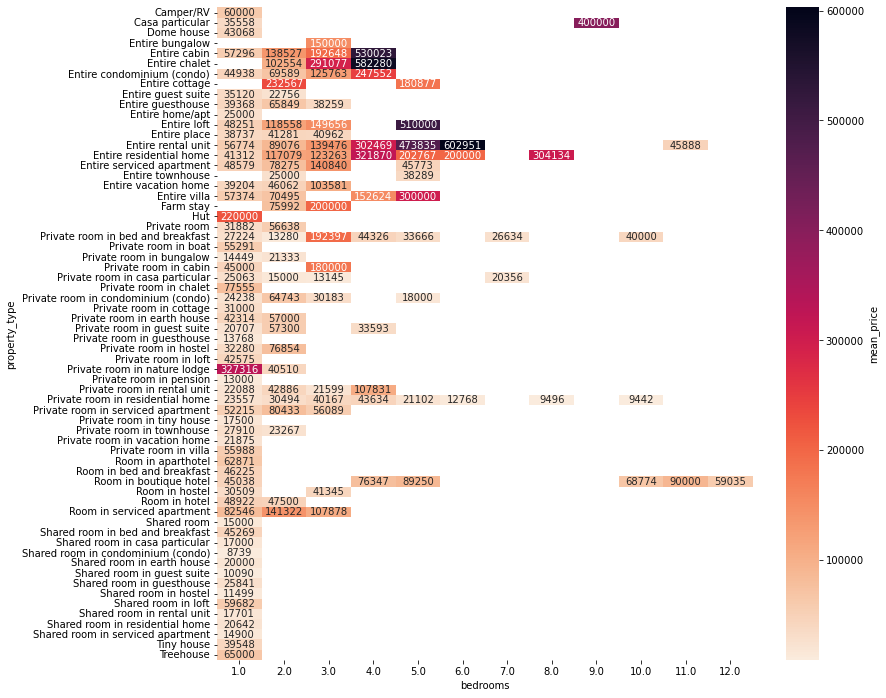

In [19]:
plt.figure(figsize=(12,12))
sns.heatmap(Listings_calendar.groupby(['property_type', 'bedrooms']).price.mean().unstack(),annot=True, fmt=".0f", cmap = sns.cm.rocket_r, cbar_kws={'label': 'mean_price'})
plt.show()

In [20]:
#Dependiendo de las amenidades es el precio que precio que va a tener. 

import nltk
from nltk.corpus import stopwords
import re

# Create a dataframe of the words that appear in the ammenities section of the most expensive listings

amenitiesDF = Listings_calendar[['amenities','price','id',]]
amenitiesDFTopper = amenitiesDF.sort_values('price',ascending=[0])
amenitiesDFtop=amenitiesDFTopper.head(30)
allemenities = ''
for index,row in amenitiesDFtop.iterrows():
    p = re.sub('[^a-zA-Z]+',' ', row['amenities'])
    allemenities+=p

allemenities_data=nltk.word_tokenize(allemenities)
filtered_data=[word for word in allemenities_data if word not in stopwords.words('english')] 
wnl = nltk.WordNetLemmatizer() 
allemenities_data=[wnl.lemmatize(data) for data in filtered_data]
allemenities_words=' '.join(allemenities_data)

Si vemos las palabras que son más grandes se puede determinar las que tienen mayor frecuencia y podría influir en los precios.

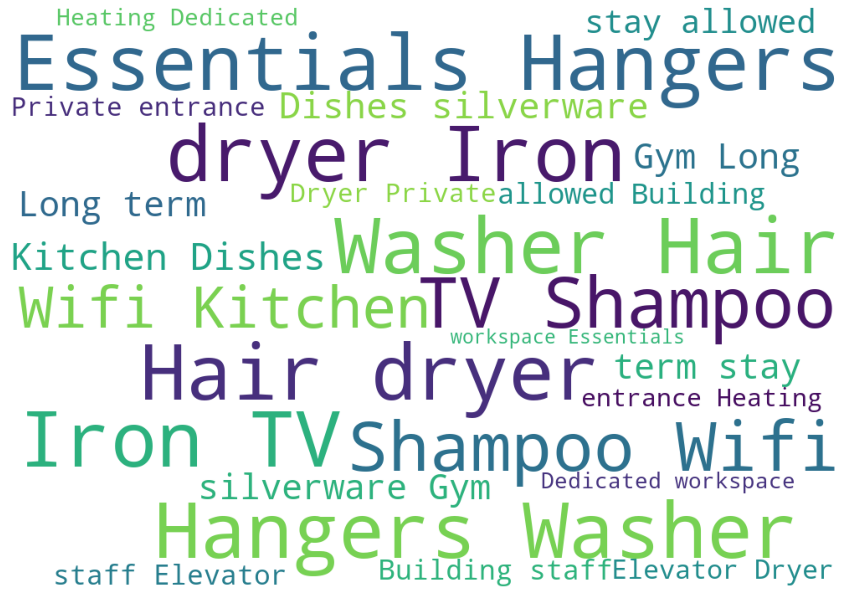

In [21]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(width = 1000, height = 700, background_color="white").generate(allemenities_words)
plt.figure(figsize=(15,15))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Función que entrega las palabras que tienen mayor frecuencia.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

def palabras_comunes(df, n):
    cv = CountVectorizer(stop_words='english', max_features=n) 
    cv_matrix = cv.fit_transform(df['amenities']) 
    df_dtm = pd.DataFrame(cv_matrix.toarray(), index=df['id'].values, columns=cv.get_feature_names_out())
    df_dtm = df_dtm.reset_index()
    df_dtm.rename(columns = {'index':'id'}, inplace = True)
    
    return df_dtm

Vemos las frecuencias de las palabras para agregar a la regresión lineal las palabras que tienen mayor frecuencia.

In [23]:
palabras = palabras_comunes(listings, 10) 

Mediana de los precios de un año para tratar de determinar el precio con la regresión lineal más adelante.

In [25]:
mean_price = Listings_calendar.groupby(['id'])['price'].mean().reset_index()

In [26]:
palabras.head(10)

,id,allowed,dryer,essentials,hot,kitchen,long,parking,term,tv,wifi
0,30950,1,2,1,2,1,1,4,1,1,1
1,52811,1,2,1,1,1,1,2,1,2,1
2,53494,1,0,1,1,1,1,1,1,2,0
3,55303,1,0,0,0,1,1,0,1,2,1
4,88731,1,2,1,1,1,1,1,1,2,1
5,88944,2,1,1,1,1,1,1,1,2,1
6,90694,1,1,1,1,1,1,0,1,2,0
7,90769,1,1,0,0,1,1,0,1,2,0
8,94147,1,1,1,0,1,1,1,1,2,1
9,100057,1,1,0,1,1,1,1,1,1,0


In [27]:
#Se agregan la mediana de los precios
Listings_mean_price = listings.merge(mean_price, left_on='id', right_on='id')

In [28]:
#Se saca la columna con las amenidades en texto.
Listings_mean_price = Listings_mean_price.drop('amenities', axis=1)

In [29]:
#Se agrega las palabras con mayores frecuencias
Listings_mean_price_palabras = Listings_mean_price.merge(palabras, left_on='id', right_on='id')

In [30]:
#Traemos las principales categorias de tipo de propiedad
df1 = Listings_mean_price_palabras[Listings_mean_price_palabras['property_type'] == 'Entire rental unit']
df2 =  Listings_mean_price_palabras[Listings_mean_price_palabras['property_type'] == 'Private room in rental unit']
df3 =  Listings_mean_price_palabras[Listings_mean_price_palabras['property_type'] == 'Private room in residential home']
df4 =  Listings_mean_price_palabras[Listings_mean_price_palabras['property_type'] == 'Entire condominium (condo)']
df5 =  Listings_mean_price_palabras[Listings_mean_price_palabras['property_type'] == 'Entire loft']

merged_df = pd.concat([df1, df2,df3,df4,df5])


In [31]:
#Se agregan las variables dummy para tipo de habitación y tipo de propiedad
df_datos = pd.get_dummies(merged_df, columns=['room_type','property_type'])

In [32]:
#renombramos los campos Room type
df_datos_nuevo = df_datos.rename(columns={'room_type_Entire home/apt': 'room_type_entire_home_apt'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'room_type_Private room': 'room_type_private_room'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'room_type_Hotel room': 'room_type_hotel_room'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'room_type_Shared room': 'room_type_shared_room'})

df_datos_nuevo = df_datos_nuevo.rename(columns={'property_type_Entire rental unit': 'property_type_Entire_rental_unit'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'property_type_Private room in rental unit': 'property_type_Private_room_in_rental_unit'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'property_type_Private room in residential home': 'property_type_Private_room_in_residential_home'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'property_type_Entire condominium (condo)': 'property_type_Entire_condominium_condo'})
df_datos_nuevo = df_datos_nuevo.rename(columns={'property_type_Entire loft': 'property_type_Entire_loft'})


In [33]:
df_datos_nuevo.head()

,id,bedrooms,beds,review_scores_rating,price,allowed,dryer,essentials,hot,kitchen,...,term,tv,wifi,room_type_entire_home_apt,room_type_private_room,property_type_Entire_condominium_condo,property_type_Entire_loft,property_type_Entire_rental_unit,property_type_Private_room_in_rental_unit,property_type_Private_room_in_residential_home
0,30950,1.0,2.0,4.50,260000.000000,1,2,1,2,1,...,1,1,1,1,0,0,0,1,0,0
1,52811,1.0,1.0,4.42,46513.000000,1,2,1,1,1,...,1,2,1,1,0,0,0,1,0,0
2,53494,2.0,8.0,4.76,149999.000000,1,0,1,1,1,...,1,2,0,1,0,0,0,1,0,0
3,55303,2.0,4.0,5.00,70000.000000,1,0,0,0,1,...,1,2,1,1,0,0,0,1,0,0
6,90694,1.0,1.0,4.67,36002.739726,1,1,1,1,1,...,1,2,0,1,0,0,0,1,0,0


In [34]:
df_datos_nuevo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4587 entries, 0 to 5417
Data columns (total 22 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   id                                              4587 non-null   int64  
 1   bedrooms                                        4587 non-null   float64
 2   beds                                            4587 non-null   float64
 3   review_scores_rating                            4587 non-null   float64
 4   price                                           4587 non-null   float64
 5   allowed                                         4587 non-null   int64  
 6   dryer                                           4587 non-null   int64  
 7   essentials                                      4587 non-null   int64  
 8   hot                                             4587 non-null   int64  
 9   kitchen                                  

In [36]:

ruta = os.getcwd() + '\\processed\\'

df_datos_nuevo.to_csv(ruta+'data_procesada.csv')